In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Frekventna karakteristika FET sljedila

In [93]:
R1 = 274
R2 = 1554


#[0,187]
data  = [[3,181],
[5.6,180],
[8.5,179],
[11,179],
[13.6,178],
[16.1,177],
[18.5,176],
[21.2,175],
[21.6,175],
[23.7,175],
[25.7,174],
[27.7,173],
[29.8,173],
[31,172]]

In [94]:
df = pd.DataFrame(data, columns = ["I","V"], 
                  index = range(1,len(data)+1))

In [95]:
df

,I,V
1,3.0,181
2,5.6,180
3,8.5,179
4,11.0,179
5,13.6,178
6,16.1,177
7,18.5,176
8,21.2,175
9,21.6,175
10,23.7,175


In [96]:
from pylab import rcParams
rcParams['figure.figsize'] = (14, 7)

In [97]:
pars,cov=curve_fit(lambda x,a,b: a*x+b ,df["I"],df["V"])

a=pars[0]
b=pars[1]

x_fit=np.linspace(-10,40)
y_fit=a*x_fit+b

print("a =", pars[0],"±", np.sqrt(cov[0,0]))
print("b =",pars[1],"±", np.sqrt(cov[1,1]))

"""plt.figure(figsize=(14,8.5))
plt.scatter(Tk,gamma,linewidth=4)
plt.grid()
plt.plot(x_fit,y_fit,color="red",linestyle="--")
plt.xlim(30+273.15,95+273.15)
plt.ylim(0.02448,0.03116)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title(r"Graf ovisnosti $T - \gamma$", fontsize=22)
plt.xlabel(r"$T$ / $\mathrm{K}$",fontsize=22)
plt.ylabel(r"$\gamma$ / $\mathrm{N/m}$",fontsize=22);"""

a = -0.31253379737238257 ± 0.009465466231386643
b = 181.9515132803359 ± 0.19223687561883845


'plt.figure(figsize=(14,8.5))\nplt.scatter(Tk,gamma,linewidth=4)\nplt.grid()\nplt.plot(x_fit,y_fit,color="red",linestyle="--")\nplt.xlim(30+273.15,95+273.15)\nplt.ylim(0.02448,0.03116)\nplt.xticks(fontsize=16)\nplt.yticks(fontsize=16)\n\nplt.title(r"Graf ovisnosti $T - \\gamma$", fontsize=22)\nplt.xlabel(r"$T$ / $\\mathrm{K}$",fontsize=22)\nplt.ylabel(r"$\\gamma$ / $\\mathrm{N/m}$",fontsize=22);'

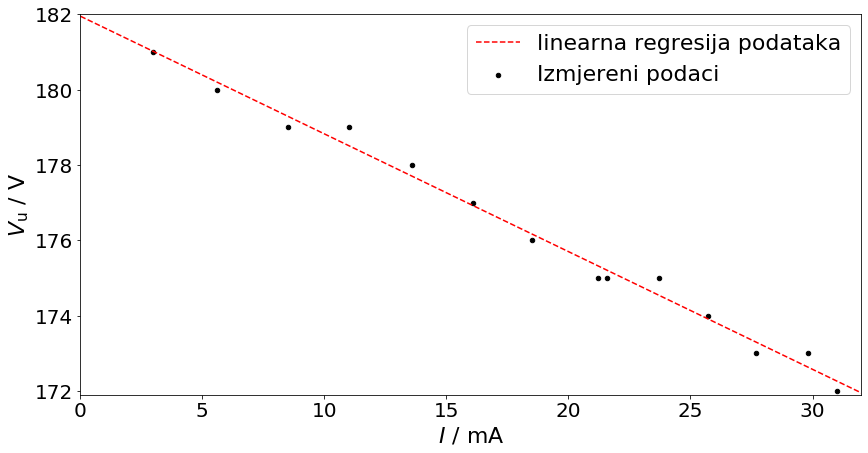

In [98]:
A0 = 0.85
p1 = df.plot.scatter(x = "I", y = "V", color = "black", label = "Izmjereni podaci")
plt.plot(x_fit,y_fit, color = "red", linestyle="--", label = "linearna regresija podataka")
#p1.set_xscale("log")
#p1.hlines(A0, 0, 1e7, color = "green", linewidth = 1.2, label=r"A_0")
#p1.hlines(A0/np.sqrt(2), 0, 1e7, color = "red", linewidth = 1.2, label=(r"$\dfrac{A_0}{\sqrt{2}}=$ " + str(round(A0/np.sqrt(2),3))))
p1.set_xlim(0,32)
p1.set_ylim(171.9,182)
p1.set_xlabel("$I \ / \ \mathrm{mA}$", size=22)
p1.set_ylabel("$V_{\mathrm{u}} \ / \ \mathrm{V}$", size=22)
p1.tick_params(axis='both', which='major', labelsize=20)
#p1.tick_params(axis="x", labelsize=16, width=2, length=8)
#p1.tick_params(axis="y", labelsize=16, width=2, length=8)
p1.legend(fontsize=22)
p1.get_figure().savefig("UI_zad1.png")

$a = -0.313 \pm 0.009$

$b = 182.9 \pm 0.2$

$\epsilon = U_{\mathrm{unutarnji}} + U_{\mathrm{mjereni}} = Ir + U_{\mathrm{mjereni}}$

$U_{\mathrm{mjereni}} = -rI + \epsilon$

$-r = -a$

$r = (0.313 \pm 0.009) \ \mathrm{\Omega}$

$V_{\mathrm{u}} = (182.9 \pm 0.2) \ \mathrm{V}$

# Frekventna karakteristika emiterskog sljedila

In [41]:
data2 = [[0,6.94,6.86],
[5,6.97,6.9],
[10,7.23,7.25],
[15,7.66,7.66],
[20,8,8.02],
[30,8.93,8.94],
[40,10.12,10.12],
[50,10.97,11],
[60,12.67,12.72],
[70,14.35,14.42],
[80,16.24,18.01],
[90,16.19,18],
[100,16.21,17.94],]

In [42]:
df2 = pd.DataFrame(data2, columns = ["n","v1","v2"])

In [43]:
df2

,n,v1,v2
0,0,6.94,6.86
1,5,6.97,6.90
2,10,7.23,7.25
3,15,7.66,7.66
4,20,8.00,8.02
5,30,8.93,8.94
6,40,10.12,10.12
7,50,10.97,11.00
8,60,12.67,12.72
9,70,14.35,14.42


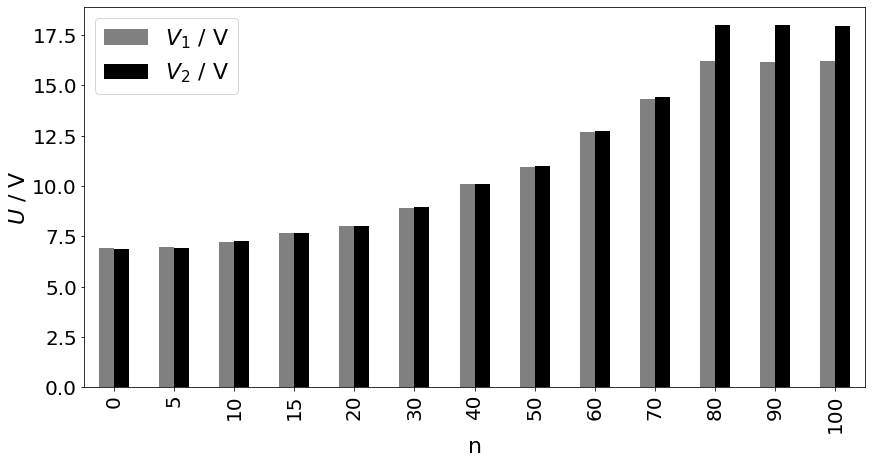

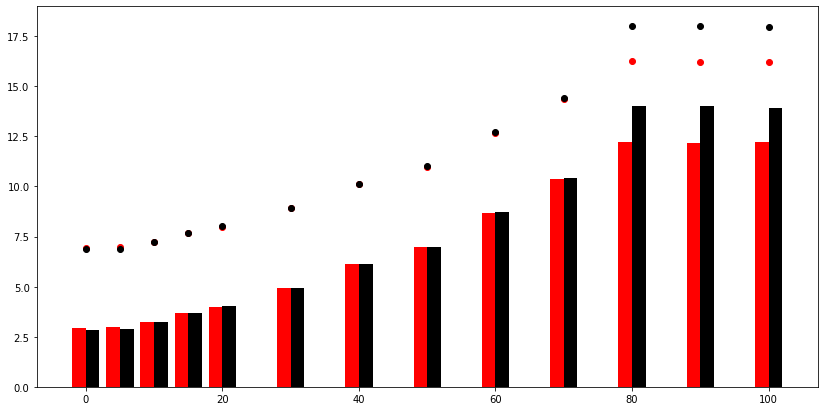

In [69]:
p1 = df2.plot(x = "n", y = ["v1","v2"], color = ["gray","black"], kind="bar")
p1.legend(["$V_{1} \ / \ \mathrm{V}$","$V_{2} \ / \ \mathrm{V}$"], fontsize=22)
p1.set_xlabel("n", size=22)
p1.set_ylabel("$U \ / \ \mathrm{V}$", size=22)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df2["n"], df2["v1"], color = "red")
ax.scatter(df2["n"], df2["v2"], color = "black")

width = 2

ax.bar(df2["n"]-width/2,df2["v1"]-4, width, color = "red")
ax.bar(df2["n"]+width/2,df2["v2"]-4, width, color = "black")

p1.tick_params(axis='both', which='major', labelsize=20)
#p1.scatter(x = "n", y = "v2", color="red")
#df2.plot.scatter(x = "n", y = "v2", color = "blue", label="v2")
#p1.set_xscale("log")
#p1.hlines(A0, 0, 1e7, color = "green", linewidth = 1.2, label=r"A_0")
#p1.hlines(A0/np.sqrt(2), 0, 1e7, color = "red", linewidth = 1.2, 
#          label=(r"$\dfrac{A_0}{\sqrt{2}}=$ " + str(round(A0/np.sqrt(2),3))))
#p1.set_xlim(0,1e7)
#p1.set_ylim(0.2,1.1)
#p1.set_xlabel("$\log{(f \ / \ \mathrm{Hz})}$", size=22)
#p1.set_xlabel("$f \ / \ \mathrm{Hz}$", size=22)
#p1.set_ylabel("$|A|$", size=22)
#p1.tick_params(axis="x", labelsize=16, width=2, length=8)
#p1.tick_params(axis="y", labelsize=16, width=2, length=8)
#p1.legend()
p1.get_figure().savefig("stab_zad2.png")
fig.savefig("stab_zad2_v2.png")

In [45]:
U = [9.02,9.038]
I = [U[0]/R1, U[1]/R2]

pars,cov=curve_fit(lambda x,a,b: a*x+b ,I,U)

a=pars[0]
b=pars[1]

x_fit=np.linspace(-10,40)
y_fit=a*x_fit+b

print("a =", pars[0],"±", np.sqrt(cov[0,0]))
print("b =",pars[1],"±", np.sqrt(cov[1,1]))

a = -0.6641147635475131 ± inf
b = 9.041862464113864 ± inf


C:\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [46]:
U = [170,176.5]
I = [0.01, 0.002]

pars,cov=curve_fit(lambda x,a,b: a*x+b ,I,U)

a=pars[0]
b=pars[1]

x_fit=np.linspace(0,1)
y_fit=a*x_fit+b

print("a =", pars[0],"±", np.sqrt(cov[0,0]))
print("b =",pars[1],"±", np.sqrt(cov[1,1]))

a = -812.5000000000007 ± inf
b = 178.125 ± inf


In [81]:
U = [9.02,9.038]
I = [U[0]/R1, U[1]/R2]

pars,cov=curve_fit(lambda x,a,b: a*x+b ,I,U)

a=pars[0]
b=pars[1]

x_fit=np.linspace(0,0.1)
y_fit=a*x_fit+b

print("a =", pars[0],"±", np.sqrt(cov[0,0]))
print("b =",pars[1],"±", np.sqrt(cov[1,1]))

a = -0.6641147635475131 ± inf
b = 9.041862464113864 ± inf


C:\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


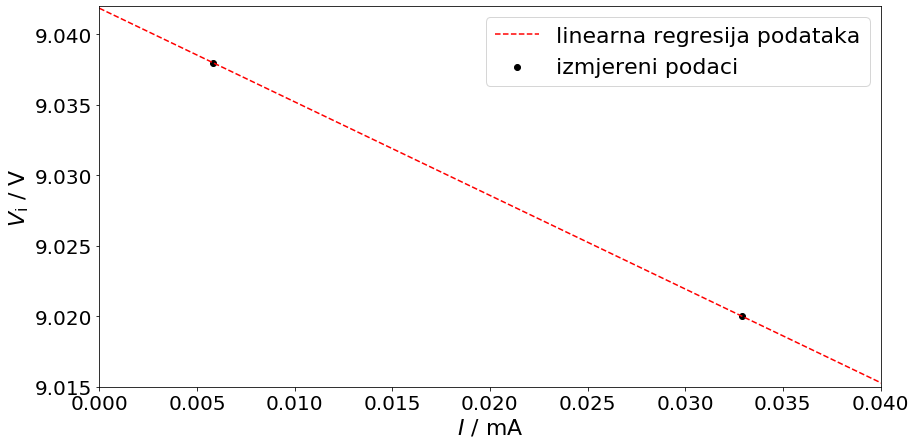

In [85]:
plt.scatter(I,U, color="black", label="izmjereni podaci")
plt.plot(x_fit,y_fit, color = "red", linestyle="--", label="linearna regresija podataka")
plt.xlim(0,0.04)
plt.ylim(9.015,9.042)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel("$I \ / \ \mathrm{mA}$", size=22)
plt.ylabel("$V_{\mathrm{i}} \ / \ \mathrm{V}$", size=22)
plt.legend(fontsize=22)
plt.savefig("UI_zadnji.png")

In [18]:
32.7-13.2

19.500000000000004